## A Machine Learning Approach to Predicting Career Salary

### Exploratory Data Analysis & Minor Data Clean Up + Feature Engineering

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_collection/data_files/cleaned_df.csv")
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,...,Revenue,simplified_job_title,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,age
0,0,IT Manager for Logistics Company,Employer Provided Salary:$80K - $100K,Job Summary:\nSupports all aspects of Company’...,-1.0,"TradePort Logistics, LLC",Georgia,Unknown,-1.0,Company - Public,...,Unknown / Non-Applicable,IT Manager,0,1,80,100,90.0,"TradePort Logistics, LLC",Georgia,-1.0
1,1,IT Director,Employer Provided Salary:$80K - $100K,Seeking an experienced IT Director to oversee ...,-1.0,Confidential,"Cranbury, NJ",-1,-1.0,-1,...,-1,IT Manager,0,1,80,100,90.0,Confidential,NJ,-1.0
2,2,Corporate IT Manager,Employer Provided Salary:$85K - $95K,Noregon is looking for a Corporate IT Manager ...,3.6,Noregon Systems\n3.6,"Greensboro, NC",51 to 200 Employees,1993.0,Company - Private,...,$5 to $10 million (USD),IT Manager,0,1,85,95,90.0,Noregon Systems\n,NC,28.0
3,3,IT Manager,Employer Provided Salary:$75K - $85K,Company: A small Entertainment Company located...,-1.0,Confidential,"Los Angeles, CA",-1,-1.0,-1,...,-1,IT Manager,0,1,75,85,80.0,Confidential,CA,-1.0
4,4,IT Project Manager (Agile delivery experience ...,Employer Provided Salary:$120K - $150K,*** Prefer candidates local to Washington DMV ...,-1.0,Radiant Infotech,"Catonsville, MD",-1,-1.0,-1,...,-1,IT Manager,0,1,120,150,135.0,Radiant Infotech,MD,-1.0


### Initial Observations

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,Revenue,simplified_job_title,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,age
0,IT Manager for Logistics Company,Employer Provided Salary:$80K - $100K,Job Summary:\nSupports all aspects of Company’...,-1.0,"TradePort Logistics, LLC",Georgia,Unknown,-1.0,Company - Public,-1,...,Unknown / Non-Applicable,IT Manager,0,1,80,100,90.0,"TradePort Logistics, LLC",Georgia,-1.0
1,IT Director,Employer Provided Salary:$80K - $100K,Seeking an experienced IT Director to oversee ...,-1.0,Confidential,"Cranbury, NJ",-1,-1.0,-1,-1,...,-1,IT Manager,0,1,80,100,90.0,Confidential,NJ,-1.0
2,Corporate IT Manager,Employer Provided Salary:$85K - $95K,Noregon is looking for a Corporate IT Manager ...,3.6,Noregon Systems\n3.6,"Greensboro, NC",51 to 200 Employees,1993.0,Company - Private,Computer Hardware & Software,...,$5 to $10 million (USD),IT Manager,0,1,85,95,90.0,Noregon Systems\n,NC,28.0
3,IT Manager,Employer Provided Salary:$75K - $85K,Company: A small Entertainment Company located...,-1.0,Confidential,"Los Angeles, CA",-1,-1.0,-1,-1,...,-1,IT Manager,0,1,75,85,80.0,Confidential,CA,-1.0
4,IT Project Manager (Agile delivery experience ...,Employer Provided Salary:$120K - $150K,*** Prefer candidates local to Washington DMV ...,-1.0,Radiant Infotech,"Catonsville, MD",-1,-1.0,-1,-1,...,-1,IT Manager,0,1,120,150,135.0,Radiant Infotech,MD,-1.0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'simplified_job_title', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48636 entries, 0 to 48635
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Job Title             48636 non-null  object 
 1   Salary Estimate       48636 non-null  object 
 2   Job Description       48636 non-null  object 
 3   Rating                48636 non-null  float64
 4   Company Name          48636 non-null  object 
 5   Location              48607 non-null  object 
 6   Size                  48612 non-null  object 
 7   Founded               48630 non-null  float64
 8   Type of ownership     48626 non-null  object 
 9   Industry              48628 non-null  object 
 10  Sector                48623 non-null  object 
 11  Revenue               48625 non-null  object 
 12  simplified_job_title  48636 non-null  object 
 13  hourly                48636 non-null  int64  
 14  employer_provided     48636 non-null  int64  
 15  min_salary         

### Data Feature Engineering & Minor Clean Up
* Job Seniority
    * Considering we added the main simplified job title, we just need to grab the senority from the Glassdoor Job Title field
* Fix some states that are not abbreviated
* Removing additional space in front of all abbreviated states
* Hourly Wage to Annual
* Remove new line from job title
* Convert columns to integer where needed

In [6]:
df['simplified_job_title'].value_counts()

Veterinarian                      1000
Dental Hygienist                   999
Nurse Practitioner                 999
Dentist                            999
Home Health Aide                   999
Marriage and Family Therapist      998
Information Security Analyst       998
Mechanical Engineer                998
Computer Systems Analyst           998
Physician Assistant                998
Physical Therapist                 998
Petroleum Engineer                 997
Statistician                       997
Substance Abuse Counselor          997
Operations Research Analyst        997
Data Scientist                     997
Occupational Therapist             997
Software Developer                 997
Chiropractor                       996
Speech Language Pathologist        996
Gynecologist                       996
Diagnostic Medical Sonographer     996
Physician                          996
Optometrist                        996
Lawyer                             995
Wind Turbine Technician  

In [7]:
# Convert each long job title to it's simplied form

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'jr'
    else:
        return 'na'

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df['seniority'].value_counts()

na        45912
senior     2575
jr          149
Name: seniority, dtype: int64

In [345]:
pd.options.display.max_rows = 1000
df.job_state.value_counts()

CA                    4871
Remote                3606
IL                    2980
TX                    2810
FL                    2631
NY                    2542
MA                    1953
WA                    1952
NC                    1379
VA                    1306
NJ                    1280
PA                    1263
CO                    1184
MD                    1026
AZ                    1020
GA                     914
OH                     908
MI                     739
TN                     629
MN                     586
NV                     569
MO                     541
OR                     537
CT                     499
OK                     467
WI                     462
California             461
UT                     436
United States          414
Florida                368
NH                     352
DC                     327
IN                     304
KY                     300
LA                     269
SC                     248
NM                     247
N

In [10]:
# Fix states that were not abbreviated
df.loc[df['job_state']=='Texas','job_state'] = 'TX'
df.loc[df['job_state']=='California','job_state'] = 'CA'
df.loc[df['job_state']=='Maryland','job_state'] = ' MD'
df.loc[df['job_state']=='New Jersey','job_state'] = 'NJ'
df.loc[df['job_state']=='Vermont','job_state'] = 'VT'
df.loc[df['job_state']=='University Park','job_state'] = 'TX'
df.loc[df['job_state']=='Saint Pete Beach','job_state'] = 'FL'
df.loc[df['job_state']=='Bristol','job_state'] = 'CT'
df.loc[df['job_state']=='Westlake Village','job_state'] = 'CA'
df.loc[df['job_state']=='Evergreen Park','job_state'] = 'IL'
df.loc[df['job_state']=='Berkeley Springs','job_state'] = 'WV'
df.loc[df['job_state']=='South Dakota','job_state'] = 'SD'
df.loc[df['job_state']=='Tennessee','job_state'] = 'TN'
df.loc[df['job_state']=='Virgin Islands','job_state'] = 'VI'
df.loc[df['job_state']=='Idaho','job_state'] = 'ID'
df.loc[df['job_state']=='Rhode Island','job_state'] = 'RI'
df.loc[df['job_state']=='Alaska','job_state'] = 'AK'
df.loc[df['job_state']=='Kansas','job_state'] = 'KS'
df.loc[df['job_state']=='New Mexico','job_state'] = 'NM'
df.loc[df['job_state']=='North Dakota','job_state'] = 'NM'
df.loc[df['job_state']=='Mississippi','job_state'] = 'MS'
df.loc[df['job_state']=='South Carolina','job_state'] = 'SC'
df.loc[df['job_state']=='Oklahoma','job_state'] = 'OK'
df.loc[df['job_state']=='Connecticut','job_state'] = 'CT'
df.loc[df['job_state']=='Nebraska','job_state'] = 'NE'
df.loc[df['job_state']=='New Hampshire','job_state'] = 'NH'
df.loc[df['job_state']=='Iowa','job_state'] = 'IA'
df.loc[df['job_state']=='New York State','job_state'] = 'NY'
df.loc[df['job_state']=='Montana','job_state'] = 'MT'
df.loc[df['job_state']=='Alabama','job_state'] = 'AL'
df.loc[df['job_state']=='Virginia','job_state'] = 'VA'
df.loc[df['job_state']=='Florida','job_state'] = 'FL'
df.loc[df['job_state']=='Michigan','job_state'] = 'MI'
df.loc[df['job_state']=='Georgia','job_state'] = 'GA'
df.loc[df['job_state']=='Pennsylvania','job_state'] = 'PA'
df.loc[df['job_state']=='Massachusetts','job_state'] = 'MA'
df.loc[df['job_state']=='Missouri','job_state'] = 'MO'
df.loc[df['job_state']=='Colorado','job_state'] = 'CO'
df.loc[df['job_state']=='Maine','job_state'] = 'ME'
df.loc[df['job_state']=='Arizona','job_state'] = 'AZ'
df.loc[df['job_state']=='Minnesota','job_state'] = 'MN'
df.loc[df['job_state']=='Washington State','job_state'] = 'WA'
df.loc[df['job_state']=='Wisconsin','job_state'] = 'WI'
df.loc[df['job_state']=='Illinois','job_state'] = 'IL'
df.loc[df['job_state']=='Harwood Heights','job_state'] = 'IL'
df.loc[df['job_state']=='Delaware','job_state'] = 'DE'
df.loc[df['job_state']=='Ohio','job_state'] = 'OH'
df.loc[df['job_state']=='Hawaii','job_state'] = 'HI'
df.loc[df['job_state']==' MD','job_state'] = 'MD'
df.loc[df['job_state']=='Indiana','job_state'] = 'IN'
df.loc[df['job_state']=='Kentucky','job_state'] = 'KY'
df.loc[df['job_state']=='Garfield Heights','job_state'] = 'OH'
df.loc[df['job_state']=='Nevada','job_state'] = 'NV'
df.loc[df['job_state']=='North Carolina','job_state'] = 'NC'
df.loc[df['job_state']=='Oregon','job_state'] = 'OR'
df.loc[df['job_state']=='Utah','job_state'] = 'UT'
df.loc[df['job_state']=='Wyoming','job_state'] = 'WY'

## Google Searched cross checked-against their job postings (in the data frame)
df.loc[df['job_state']=='Princeton Junction','job_state'] = 'NJ'
df.loc[df['job_state']=='Spokane Valley','job_state'] = 'WA'
df.loc[df['job_state']=='Vadnais Heights','job_state'] = 'MN'
df.loc[df['job_state']=='Sandy Springs','job_state'] = 'GA'
df.loc[df['job_state']=='St Louis Park','job_state'] = 'MN'
df.loc[df['job_state']=='Moreno','job_state'] = 'CA'
df.loc[df['job_state']=='Concord','job_state'] = 'CA'
df.loc[df['job_state']=='White Oak','job_state'] = 'TX'
df.loc[df['job_state']=='St Thomas','job_state'] = "VI"
df.loc[df['job_state']=='Indian Hills','job_state'] = 'KY'
df.loc[df['job_state']=='North Bay','job_state'] = 'WI'

In [11]:
df['job_state'].value_counts()

CA               5336
Remote           3606
IL               3091
TX               3049
FL               3000
NY               2582
MA               2078
WA               2051
NC               1517
VA               1488
NJ               1427
PA               1388
CO               1284
AZ               1115
GA               1085
MD               1074
OH                963
MI                908
MN                688
MO                657
TN                632
OR                630
NV                579
CT                545
WI                544
UT                510
OK                500
United States     414
NH                388
KY                357
IN                354
DC                327
NM                307
NE                294
ME                276
MT                270
LA                269
SC                264
MS                259
KS                251
HI                237
ND                209
AK                204
AL                198
IA                178
ID        

In [12]:
# Hourly wage to annual (multiplying the hourly rates by 2 (which is really 2,000))
df['min_salary'] = df.apply(lambda x: x.min_salary * 2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary * 2 if x.hourly == 1 else x.max_salary, axis = 1)

In [13]:
# Remove '\n' in company_txt
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',''))

In [14]:
df['company_txt']

0        TradePort Logistics, LLC
1                    Confidential
2                 Noregon Systems
3                    Confidential
4                Radiant Infotech
                   ...           
48631       Thompson Technologies
48632                  CVS Health
48633          UnitedHealth Group
48634                   Microsoft
48635                   Travelers
Name: company_txt, Length: 48636, dtype: object

In [15]:
# Need to convert respective columns to integer
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'simplified_job_title', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'seniority'],
      dtype='object')

In [16]:
# Remove rows from numeric columns that are null or not valid 

# job_state
df = df[df['job_state'] != 0.0]
df = df[df['job_state'].notnull()]

# Founded Year
df = df[df['Founded'].notnull()]

In [17]:
#Need to convert columns to integer
df['Rating'] = df['Rating'].astype(int)
df['Founded'] = df['Founded'].astype(int)
df['hourly'] = df['hourly'].astype(int)
df['employer_provided'] = df['employer_provided'].astype(int)
df['min_salary'] = df['min_salary'].astype(int)
df['max_salary'] = df['max_salary'].astype(int)
df['avg_salary'] = df['avg_salary'].astype(int)
df['age'] = df['age'].astype(int)

### EDA

In [354]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age
count,48601.000000,48601.00000,48601.000000,48601.000000,48601.000000,48601.000000,48601.000000,48601.000000
mean,1.306290,846.41209,0.225489,0.019341,98.644946,147.605564,110.722701,22.459003
std,2.198646,975.29967,0.417908,0.137722,66.748634,96.386472,76.042670,43.471187
min,-1.000000,-1.00000,0.000000,0.000000,12.000000,18.000000,9.000000,-1.000000
25%,-1.000000,-1.00000,0.000000,0.000000,55.000000,85.000000,65.000000,-1.000000
50%,2.000000,-1.00000,0.000000,0.000000,75.000000,121.000000,90.000000,-1.000000
75%,3.000000,1979.00000,0.000000,0.000000,125.000000,180.000000,132.000000,27.000000
max,5.000000,2021.00000,1.000000,1.000000,550.000000,550.000000,550.000000,396.000000


In [355]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'simplified_job_title', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'seniority'],
      dtype='object')

<AxesSubplot:>

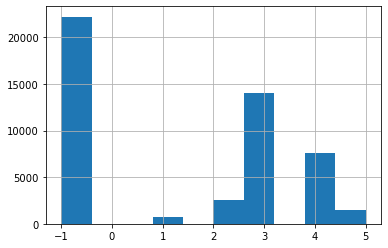

In [356]:
df.Rating.hist()

<AxesSubplot:>

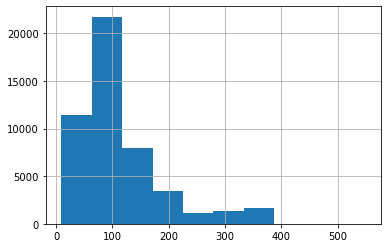

In [357]:
df.avg_salary.hist()

<AxesSubplot:>

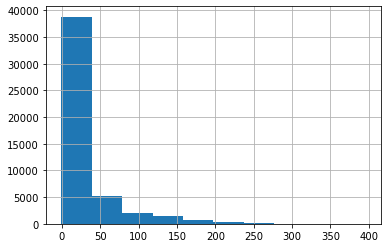

In [358]:
df.age.hist()

<AxesSubplot:>

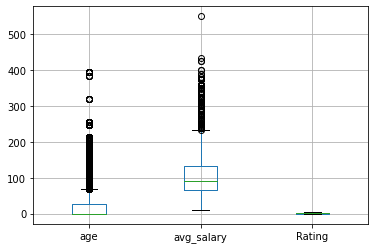

In [359]:
df.boxplot(column = ['age','avg_salary','Rating'])

<AxesSubplot:>

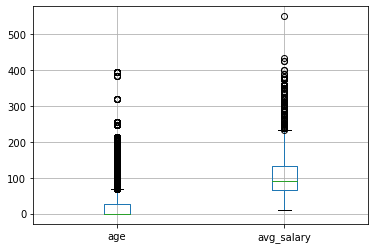

In [360]:
df.boxplot(column = ['age','avg_salary'])

<AxesSubplot:>

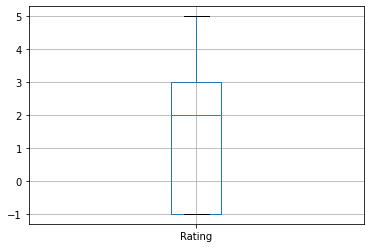

In [361]:
df.boxplot(column = 'Rating')

<AxesSubplot:>

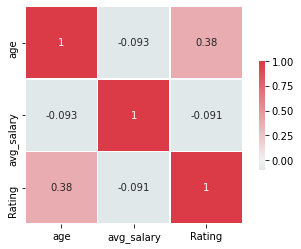

In [20]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(df[['age','avg_salary','Rating']].corr(), vmax = 1.0, center = 0, cmap = cmap, annot= True,
           square = True, linewidths = .5, cbar_kws = {"shrink":.5})

In [363]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt',
             'job_state','simplified_job_title', 'seniority']]

graph for Location: total = 2233


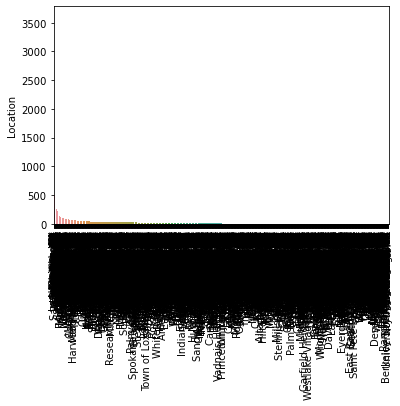

graph for Size: total = 9


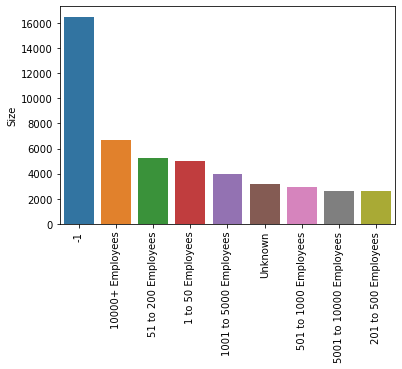

graph for Type of ownership: total = 14


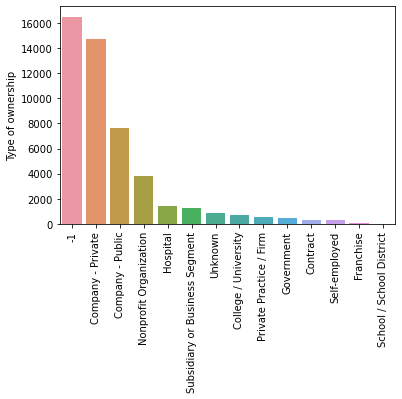

graph for Industry: total = 100


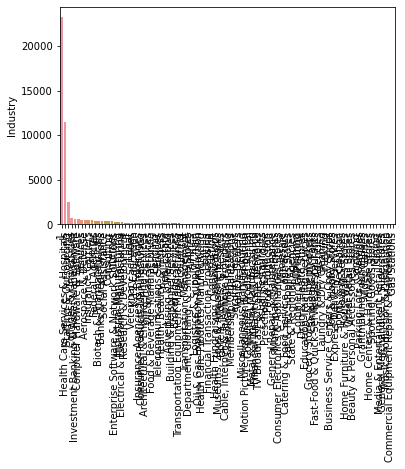

graph for Sector: total = 26


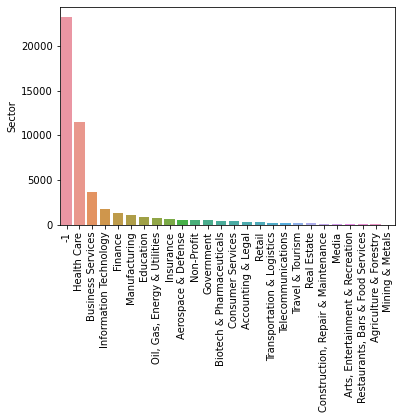

graph for Revenue: total = 14


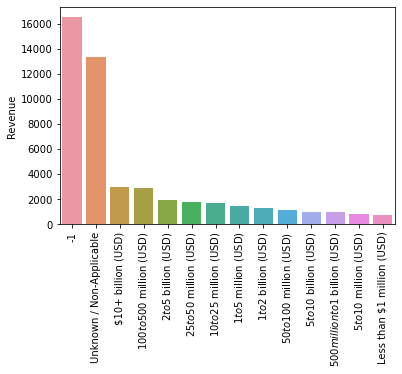

graph for company_txt: total = 4631


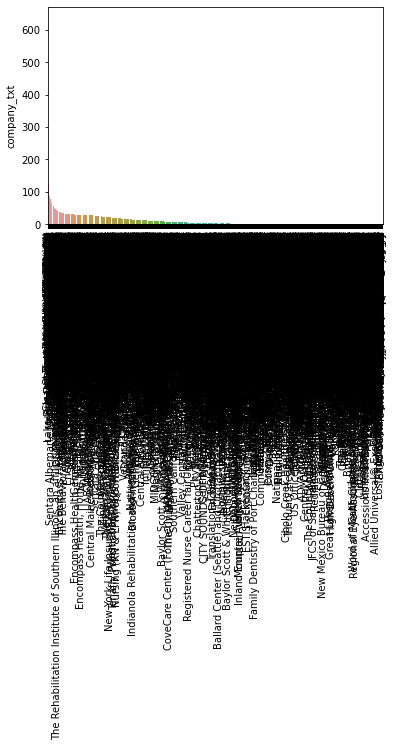

graph for job_state: total = 56


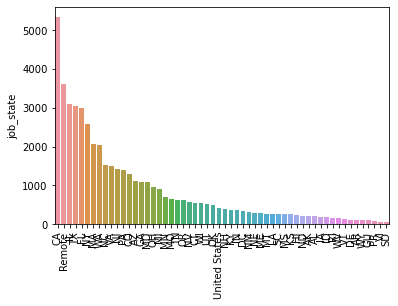

graph for simplified_job_title: total = 51


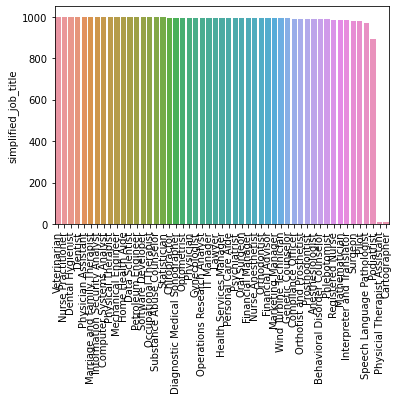

graph for seniority: total = 3


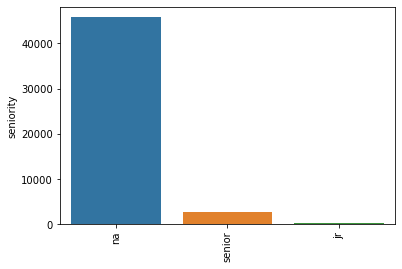

In [364]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" %(i,len(cat_num)))
    chart = sns.barplot(x =  cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

graph for Location: total = 20


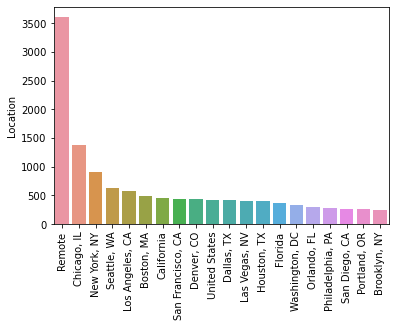

graph for company_txt: total = 20


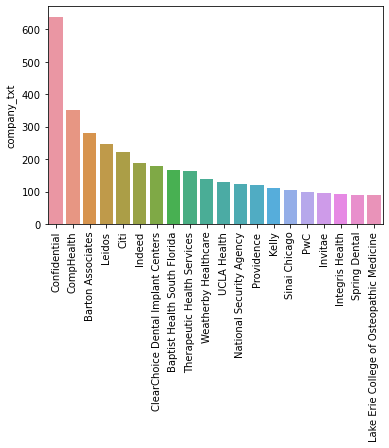

In [365]:
for i in df_cat[['Location','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" %(i,len(cat_num)))
    chart = sns.barplot(x =  cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

In [366]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'simplified_job_title', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'seniority'],
      dtype='object')

In [367]:
pd.set_option('display.max_rows', None) 
pd.pivot_table(df, index = ['job_state','simplified_job_title'], values = 'avg_salary')

avg_salary
job_state     simplified_job_title                      
AK            Dental Hygienist                 93.863636
              Diagnostic Medical Sonographer   73.600000
              Genetic Counselor                35.757576
              Marriage and Family Therapist    89.000000
              Nurse Anesthetist               225.000000
              Nurse Practitioner               98.000000
              Occupational Therapist           63.000000
              Oral Surgeon                    311.000000
              Petroleum Engineer               80.590909
              Physical Therapist               56.466667
              Physician                       107.500000
              Physician Assistant              93.222222
              Pilot                           104.607143
              Psychiatrist                    358.000000
              Speech Language Pathologist      79.400000
              Statistician                    188.000000
              Substance Abuse Counselor        80.000000
              Surgeon                         233.333333
AL            Anesthesiologist                337.000000
              Compliance Officer              175.000000
              Computer Systems Analyst        101.000000
              Dentist                         236.666667
              Financial Advisor                77.000000
              Genetic Counselor                24.962963
              Gynecologist                    210.666667
              IT Manager                       92.000000
              Interpreter and Translator       39.375000
              Marketing Manager               107.600000
              Mathematician                    92.222222
              Nurse Anesthetist               188.325581
              Operations Research Analyst     137.000000
              Oral Surgeon                    311.000000
              Orthodontist                    238.375000
              Orthotist and Prosthetist       151.000000
              Phlebotomist                     20.000000
              Physician                       129.571429
              Podiatrist                       85.000000
              Registered Nurse                 71.000000
              Speech Language Pathologist      78.500000
              Statistician                    188.000000
AR            Dentist                         221.500000
              Gynecologist                    203.571429
              Information Security Analyst     75.000000
              Oral Surgeon                    311.000000
              Personal Care Aide               28.090909
              Phlebotomist                     20.000000
              Physical Therapist               75.000000
              Pilot                           103.205882
              Speech Language Pathologist      79.250000
              Surgeon                         156.000000
              Veterinarian                    105.000000
AZ            Anesthesiologist                246.333333
              Behavioral Disorder Counselor    27.000000
              Chiropractor                     93.833333
              Compliance Officer               92.500000
              Data Scientist                   96.853659
              Dental Hygienist                 42.000000
              Dentist                         223.793103
              Diagnostic Medical Sonographer   79.086957
              Financial Advisor               110.826087
              Genetic Counselor                47.000000
              Gynecologist                    149.181818
              Health Services Manager          61.800000
              Home Health Aide                 29.800000
              IT Manager                       90.066667
              Information Security Analyst     75.705882
              Interpreter and Translator       30.000000
              Lawyer                          123.431818
              Marketing Manager               156.600000

In [368]:
pd.pivot_table(df, index = ['job_state','simplified_job_title'], values = 'avg_salary').sort_values('avg_salary',ascending = False)

,,avg_salary
job_state,simplified_job_title,
SC,Psychiatrist,369.000000
AK,Psychiatrist,358.000000
KY,Psychiatrist,358.000000
LA,Psychiatrist,358.000000
DC,Psychiatrist,358.000000
MS,Psychiatrist,358.000000
CO,Psychiatrist,353.600000
NV,Surgeon,350.000000
IN,Psychiatrist,341.500000


In [369]:
pd.pivot_table(df,index = ['simplified_job_title','seniority'], values = 'avg_salary')

avg_salary
simplified_job_title           seniority            
Anesthesiologist               na         244.776768
Behavioral Disorder Counselor  na          28.791030
                               senior      32.875000
Cartographer                   na          56.250000
Chiropractor                   na          81.491968
Compliance Officer             na          91.131548
                               senior      90.757576
Computer Systems Analyst       jr         106.032258
                               na          90.244361
                               senior      92.050575
Data Scientist                 jr          98.944444
                               na          97.378902
                               senior     108.040000
Dental Hygienist               na          90.823824
Dentist                        na         227.976977
Diagnostic Medical Sonographer na          73.349749
                               senior      60.000000
Financial Advisor              na         102.491961
                               senior     107.650000
Financial Manager              na          95.716710
                               senior      94.149123
Genetic Counselor              na          36.852846
                               senior      31.672131
Gynecologist                   na         203.195980
                               senior     204.000000
Health Services Manager        na          62.373975
                               senior      60.222222
Home Health Aide               na          31.316751
                               senior      28.384615
IT Manager                     jr          92.000000
                               na          91.785088
                               senior      92.227848
Information Security Analyst   jr          75.000000
                               na          75.734756
                               senior      79.545455
Interpreter and Translator     na          44.720812
Lawyer                         jr         131.500000
                               na         147.051230
                               senior     225.000000
Marketing Manager              na         129.114620
                               senior     115.528986
Marriage and Family Therapist  na          88.542084
Mathematician                  jr          35.000000
                               na          94.379573
                               senior      98.600000
Mechanical Engineer            jr          89.259259
                               na          95.373599
                               senior     100.851190
Nurse Anesthetist              na         192.801811
Nurse Practitioner             na         140.686687
Occupational Therapist         na          73.710130
Operations Research Analyst    jr          79.500000
                               na          86.258621
                               senior      83.892045
Optometrist                    na         119.018072
Oral Surgeon                   na         305.951710
Orthodontist                   na         239.667674
Orthotist and Prosthetist      na          81.766902
Personal Care Aide             na          24.492944
                               senior      15.000000
Petroleum Engineer             na          81.800464
                               senior      82.496296
Phlebotomist                   na          20.102296
                               senior      24.741935
Physical Therapist             na          58.010020
Physicial Therapist Assistant  na          46.444444
                               senior      72.000000
Physician                      na         113.752016
                               senior     115.000000
Physician Assistant            na          91.698397
Pilot                          na         105.199580
                               senior     103.750000
Podiatrist                     na         131.836895
                               senior      85.000000
Prosthodontist

In [370]:
df_pivots = df[['Rating','Industry','Sector','Revenue','hourly','Type of ownership','avg_salary']]

In [371]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i,values = 'avg_salary').sort_values('avg_salary',ascending = False))

Rating
        avg_salary
Rating            
 1      157.226496
 5      134.175620
-1      118.613914
 4      102.718746
 2      102.184138
 3       99.387576
Industry
                                           avg_salary
Industry                                             
Gambling                                   238.000000
Legal                                      139.232673
Grantmaking Foundations                    135.000000
Commercial Printing                        130.294118
Accounting                                 129.349515
Veterinary Services                        128.531073
Camping & RV Parks                         127.083333
Museums, Zoos & Amusement Parks            125.300000
Staffing & Outsourcing                     124.558168
Financial Transaction Processing           124.253165
Express Delivery Services                  123.142857
Home Furniture & Housewares Stores         120.200000
Trucking                                   120.000000
-1                    

ValueError: Grouper for 'avg_salary' not 1-dimensional

### Removing groups of jobs that we do not posses sufficient data on

In [372]:
df.shape

(48601, 22)

In [373]:
df['simplified_job_title'].value_counts()

Veterinarian                      1000
Nurse Practitioner                 999
Dental Hygienist                   999
Dentist                            999
Physician Assistant                998
Marriage and Family Therapist      998
Information Security Analyst       998
Computer Systems Analyst           998
Physical Therapist                 998
Mechanical Engineer                998
Home Health Aide                   998
Data Scientist                     997
Petroleum Engineer                 997
Software Developer                 997
Occupational Therapist             997
Substance Abuse Counselor          997
Statistician                       997
Chiropractor                       996
Diagnostic Medical Sonographer     996
Optometrist                        996
Physician                          996
Gynecologist                       996
Operations Research Analyst        996
IT Manager                         995
Lawyer                             995
Health Services Manager  

In [15]:
df= df[df['simplified_job_title'] != 'Physicial Therapist Assistant']
df= df[df['simplified_job_title'] != 'Cartographer']
df.shape

(48522, 22)

In [375]:
df.simplified_job_title.value_counts()

Veterinarian                      1000
Dental Hygienist                   999
Nurse Practitioner                 999
Dentist                            999
Physical Therapist                 998
Computer Systems Analyst           998
Home Health Aide                   998
Mechanical Engineer                998
Marriage and Family Therapist      998
Physician Assistant                998
Information Security Analyst       998
Occupational Therapist             997
Data Scientist                     997
Substance Abuse Counselor          997
Petroleum Engineer                 997
Software Developer                 997
Statistician                       997
Gynecologist                       996
Operations Research Analyst        996
Chiropractor                       996
Physician                          996
Diagnostic Medical Sonographer     996
Optometrist                        996
Lawyer                             995
IT Manager                         995
Health Services Manager  

In [376]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'simplified_job_title', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'seniority'],
      dtype='object')

In [377]:
for col in df.columns:
    print(col,len(df[(df[col]==str(-1)) | (df[col]==int(-1))]))

Job Title 0
Salary Estimate 0
Job Description 0
Rating 22219
Company Name 0
Location 0
Size 16503
Founded 27669
Type of ownership 16503
Industry 23222
Sector 23220
Revenue 16503
simplified_job_title 0
hourly 0
employer_provided 0
min_salary 0
max_salary 0
avg_salary 0
company_txt 0
job_state 0
age 27669
seniority 0


In [378]:
df = df.replace(str(-1),np.nan)
df = df.replace(int(-1),np.nan)
df.isna().sum()

Job Title                   0
Salary Estimate             0
Job Description             0
Rating                  22219
Company Name                0
Location                    0
Size                    16527
Founded                 27669
Type of ownership       16512
Industry                23230
Sector                  23233
Revenue                 16514
simplified_job_title        0
hourly                      0
employer_provided           0
min_salary                  0
max_salary                  0
avg_salary                  0
company_txt                 0
job_state                   0
age                     27669
seniority                   0
dtype: int64

In [379]:
df.groupby('simplified_job_title')['Rating'].mean().round()

simplified_job_title
Anesthesiologist                  3.0
Behavioral Disorder Counselor     3.0
Chiropractor                      3.0
Compliance Officer                3.0
Computer Systems Analyst          3.0
Data Scientist                    3.0
Dental Hygienist                  3.0
Dentist                           3.0
Diagnostic Medical Sonographer    3.0
Financial Advisor                 3.0
Financial Manager                 3.0
Genetic Counselor                 4.0
Gynecologist                      3.0
Health Services Manager           3.0
Home Health Aide                  3.0
IT Manager                        3.0
Information Security Analyst      3.0
Interpreter and Translator        3.0
Lawyer                            3.0
Marketing Manager                 4.0
Marriage and Family Therapist     4.0
Mathematician                     4.0
Mechanical Engineer               4.0
Nurse Anesthetist                 3.0
Nurse Practitioner                3.0
Occupational Therapist       

In [16]:
## Filling our missing values with 

# Average company rating for each group of job
df['Rating'] = df['Rating'].replace(-1, np.nan)
df["Rating"] = df.groupby("simplified_job_title").transform(lambda x: x.fillna(round(x.mean())))
df.dropna(axis = 0, inplace = True)
df['simplified_job_title'].value_counts()

Veterinarian                      1000
Dentist                            999
Computer Systems Analyst           998
Mechanical Engineer                998
Information Security Analyst       998
Marriage and Family Therapist      998
Nurse Practitioner                 998
Software Developer                 997
Petroleum Engineer                 997
Substance Abuse Counselor          997
Data Scientist                     997
Statistician                       997
Physical Therapist                 997
Home Health Aide                   996
Chiropractor                       996
Dental Hygienist                   996
Physician Assistant                996
Gynecologist                       996
Physician                          996
IT Manager                         995
Lawyer                             995
Financial Manager                  994
Health Services Manager            994
Oral Surgeon                       994
Nurse Anesthetist                  994
Diagnostic Medical Sonogr

In [17]:
df.to_csv('eda_data.csv')